<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Business Analytics</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

In [ ]:
!pip install -U scikit-learn imbalanced-learn

In [ ]:
!pip install -U imbalanced-learn xgboost

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
!jupyter nbconvert "/content/drive/MyDrive/McCombs Data Science/Ensemble Techniques and Model Tuning/Project_Full_Code_Notebook_EasyVisa.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/McCombs Data Science/Ensemble Techniques and Model Tuning/Project_Full_Code_Notebook_EasyVisa.ipynb to html
/usr/local/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 41 image(s).
[NbConvertApp] Writing 2435013 bytes to /content/drive/MyDrive/McCombs Data Science/Ensemble Techniques and Model Tuning/Project_Full_Code_Notebook_EasyVisa.html


In [ ]:
import numpy as np
import pandas as pd

#libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)



In [ ]:
#Connecting withe google drive
from google.colab import drive
drive.mount('/content/drive') # connecting to google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/McCombs Data Science/Ensemble Techniques and Model Tuning/EasyVisa.csv")
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified


In [ ]:
visa = data.copy()


# **Overview of the Dataset**

* Observations

* Sanity checks

In [ ]:
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


In [ ]:
visa.shape

(25480, 12)

There are 25480 rows and 12 columns


In [ ]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Out of 12 columns 3 columns are numeric, rest of the columns are object types


In [ ]:
visa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


In [ ]:
visa.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


There are no null values

In [ ]:
visa.duplicated().sum()

0

In [ ]:
data_col = visa.select_dtypes(include = "object").columns

for col in data_col:
  print(visa[col].value_counts())
  print("-"*50)


EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

Most of the people are immigrants and are from Asia Continent.Most of the people doesn't require job training.Most of the companies are offering Full time position.

In [ ]:
#Dropping case id column beacuse all the values are unique
visa.drop(columns=["case_id"],axis=1,inplace=True)

In [ ]:
#changing the values of case_status
visa["case_status"].astype("category")
visa["case_status"] = visa["case_status"].map({"Certified":1,"Denied":0})


# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**

What is the distribution of visa case statuses (certified vs. denied)?


1. What is the distribution of visa case statuses (certified vs. denied)?
2. How does the education level of employees impact visa approval rates?
3. Is there a significant difference in visa approval rates between employees with and without prior job experience?
4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?
5. Do certain regions in the US have higher visa approval rates compared to others?
6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?
7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

## Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


Fixing Negative values of number of employees column

In [ ]:
visa.loc[visa["no_of_employees"] < 0].shape

(33, 11)

There are 33 entries with negative values. We will convert them to positive values

In [ ]:
visa["no_of_employees"] = abs(visa["no_of_employees"])

####Observation on number of employees in the employer's company

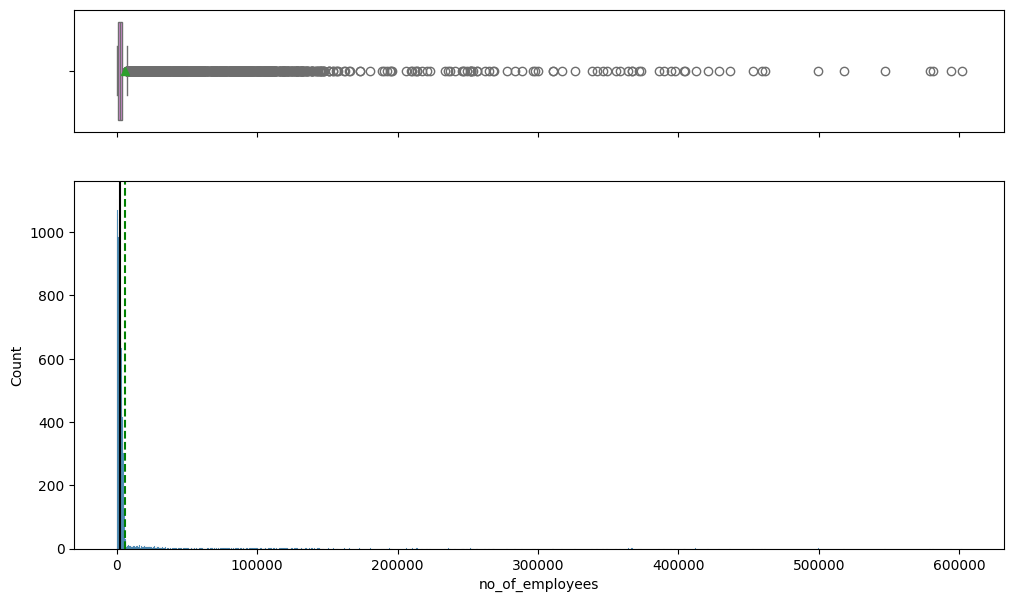

In [ ]:

histogram_boxplot(visa,"no_of_employees")

Right Skewed distribution. Mean is greater than median. There is a long tail in the right side.

#### Observations on prevailing_wage

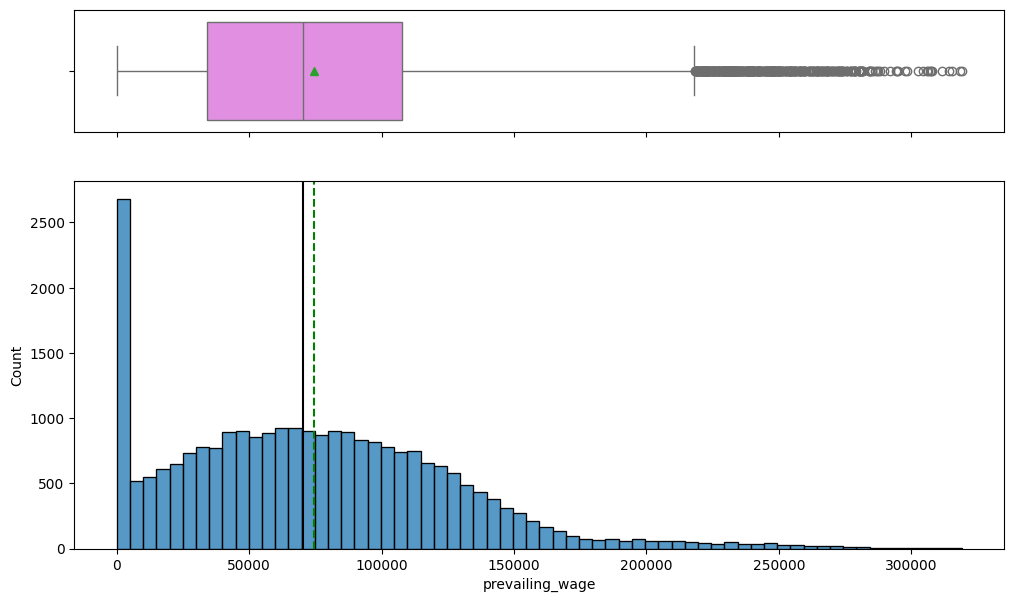

In [ ]:
histogram_boxplot(visa,"prevailing_wage")

Most of the wages fall between 30K to 150k rage, There a values with very low wage clustered together as 0.

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        legend=False,hue=feature,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

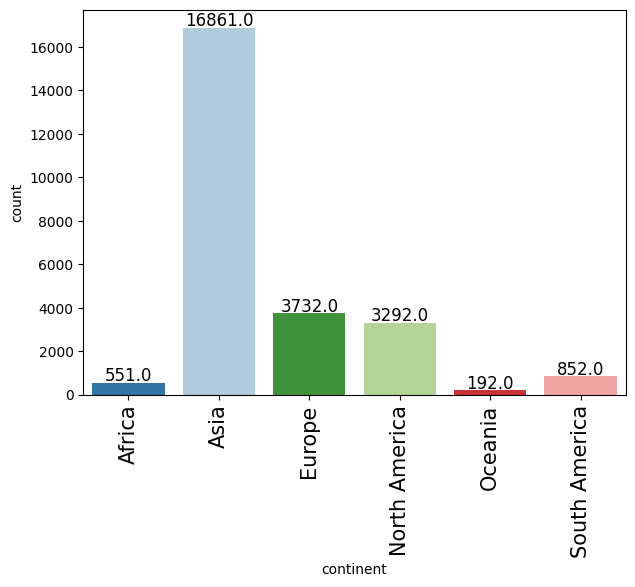

In [ ]:
labeled_barplot(visa,"continent")

Most of the employees are from the Asia continent.Very few are from Oceania.

#### Observation on Education of Employee

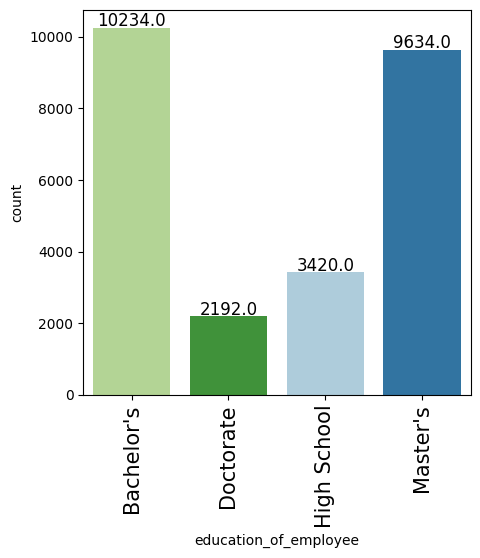

In [ ]:
labeled_barplot(visa,"education_of_employee")

Top two education levels of the employees are Bachelor's(10,234 employees) and Master's(9,634 employees) . Very few applications of the people who hold Doctorate.

#### Observations on Job Experience

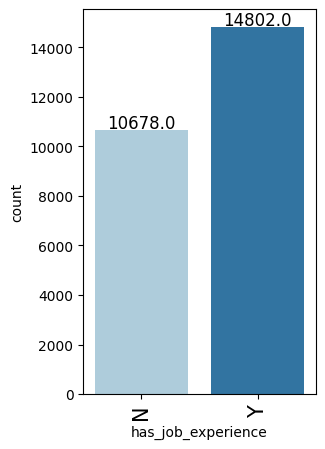

In [ ]:
labeled_barplot(visa,"has_job_experience")

People with prior experience in the roles applied more, than the people with no experience.

#### Observations on Job training requirement

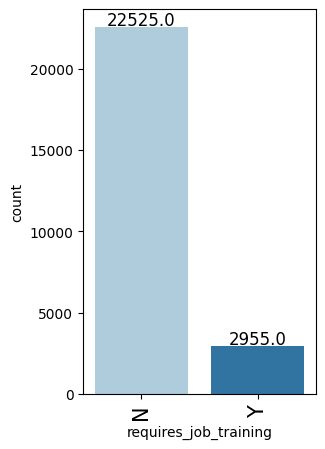

In [ ]:
labeled_barplot(visa,"requires_job_training")

Most of the people doesn't require Job training.

#### Observations on Region of Employment

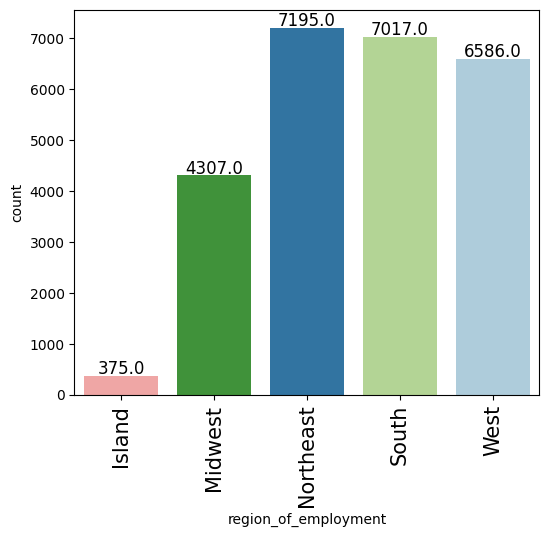

In [ ]:
labeled_barplot(visa,"region_of_employment")

Most of the Job openings are in Northeast,South and West regions. Midwest has moderate number of Job openings while Island region has less number of openings compared to all.


#### Observations on Unit of wages

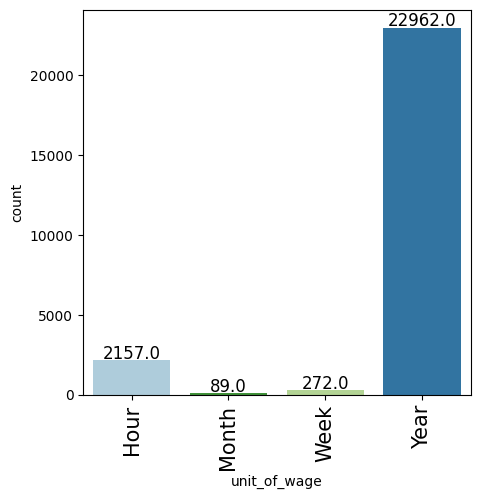

In [ ]:
labeled_barplot(visa,"unit_of_wage")

Most of the wages are yearly-based, implying that most of the openings are full-time, with very few being monthly-based.

#### Observations on position if they are full time or not

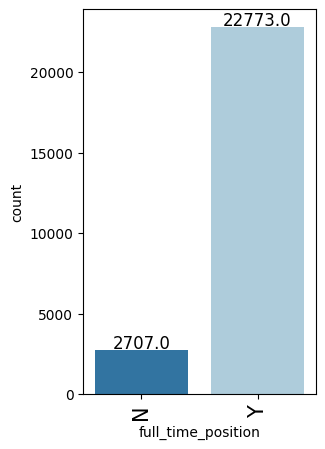

In [ ]:
labeled_barplot(visa,"full_time_position")

Majority of the openings are full time based.

## Bivariate Analysis

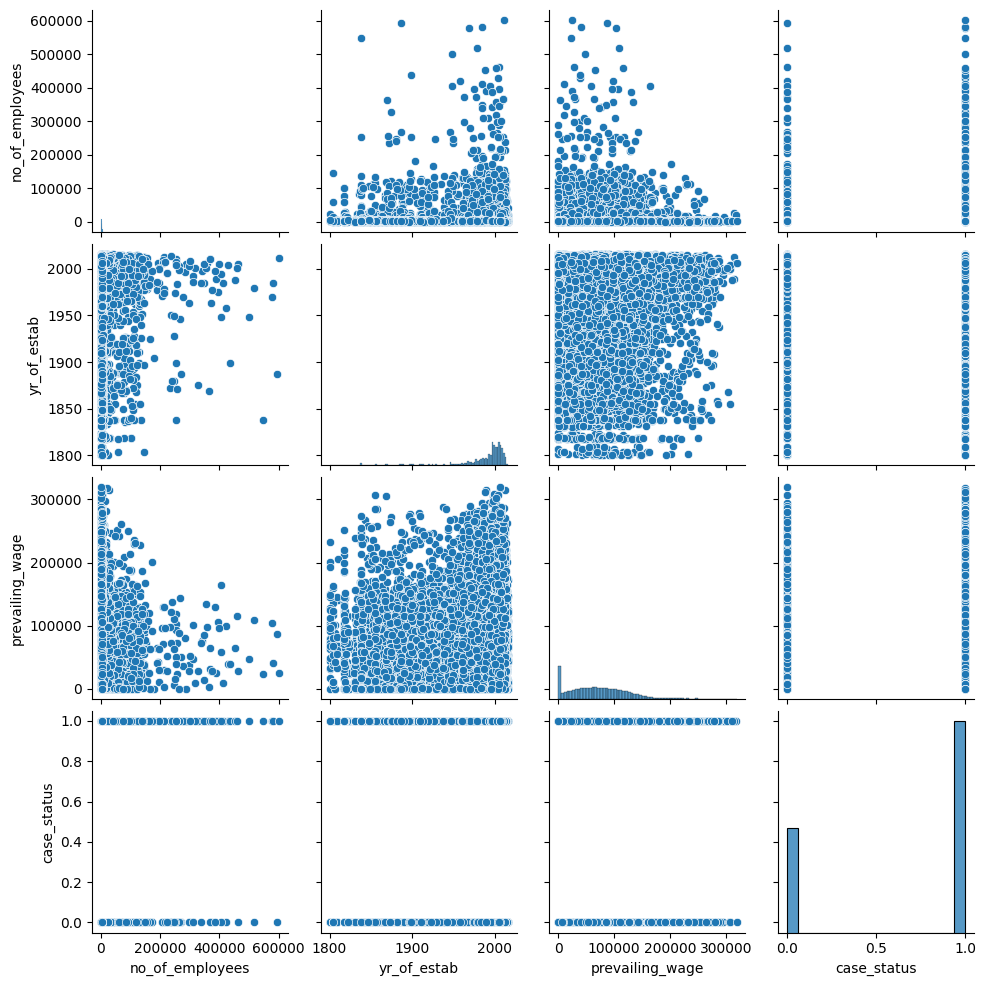

In [ ]:
sns.pairplot(data=visa)
plt.show()

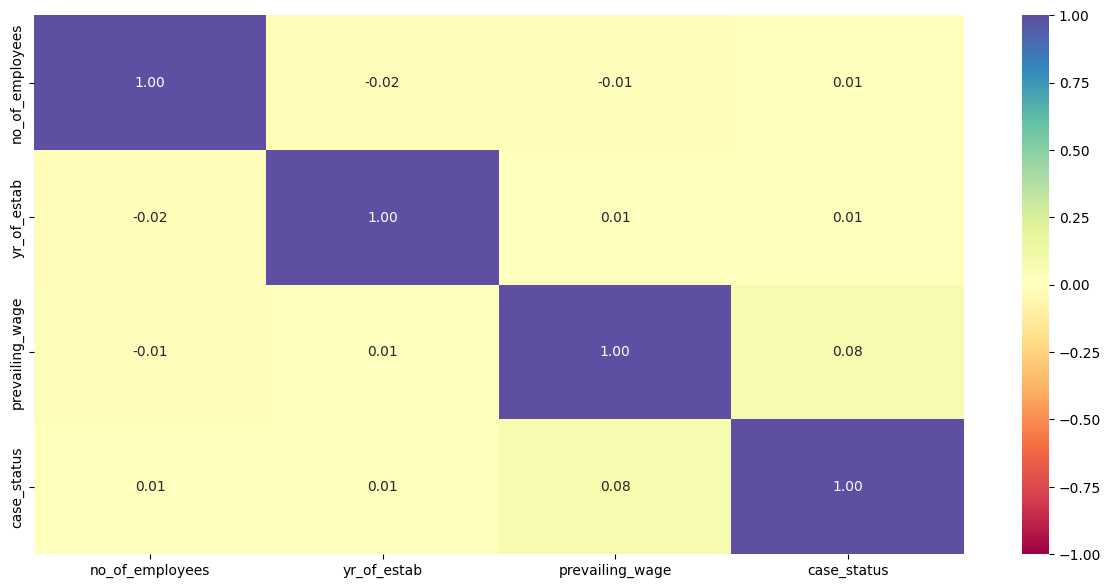

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(visa.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There no strong correlation seen for the columns

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Continent Vs Case Status

Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


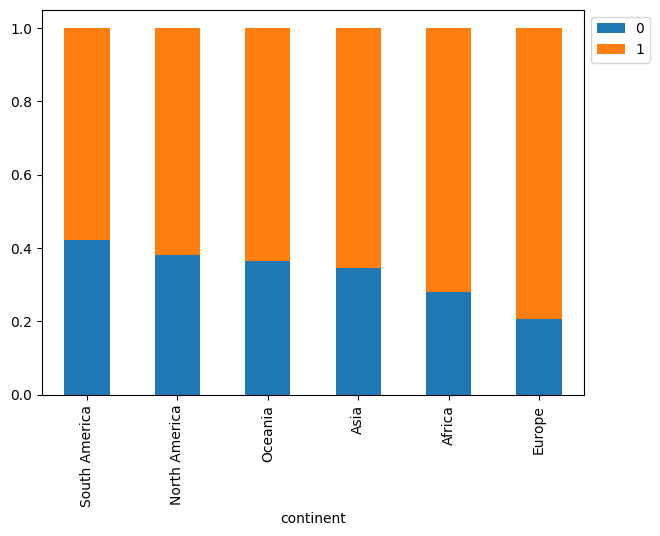

In [ ]:
stacked_barplot(visa,"continent","case_status")

Yes, Visa approval rates are different accross continents.Europe has the highest rate of approval, while South America has lowest rate of approval out of all continents.

####Education Vs Case Status

**How does the education level of employees impact visa approval rates?**

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
Bachelor's             3867   6367  10234
High School            2256   1164   3420
Master's               2059   7575   9634
Doctorate               280   1912   2192
------------------------------------------------------------------------------------------------------------------------


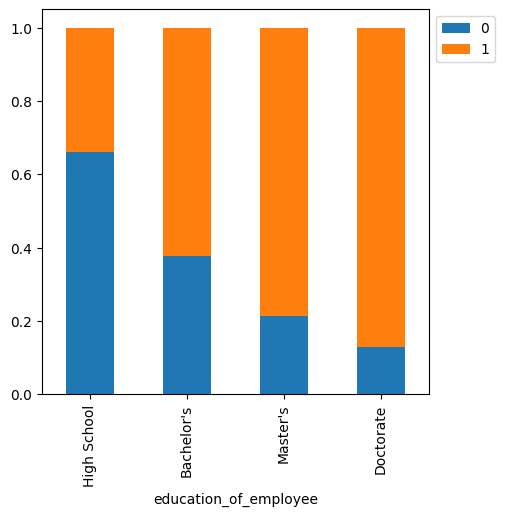

In [ ]:
stacked_barplot(visa,"education_of_employee","case_status")

People with a Doctorate have the highest chances of getting their visa approved, while the people with a high school education have lowest chances of visa approval. People with Master's and Bachelor's also have good chances to get their visa approval.

#### Job experience Vs Case Status

**Is there a significant difference in visa approval rates between employees with and without prior job experience?**

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
N                   4684   5994  10678
Y                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


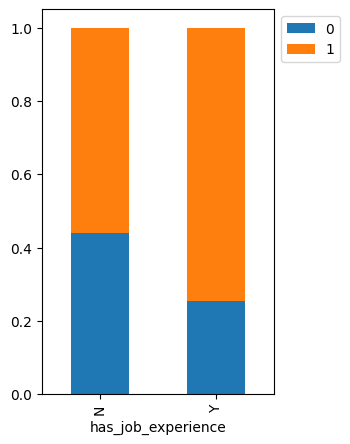

In [ ]:
stacked_barplot(visa,"has_job_experience","case_status")

There is a significant difference, People with prior Job experience have a higher visa approval rate than those with no experience.

#### Observations Vs Job training requirement

case_status               0      1    All
requires_job_training                    
All                    8462  17018  25480
N                      7513  15012  22525
Y                       949   2006   2955
------------------------------------------------------------------------------------------------------------------------


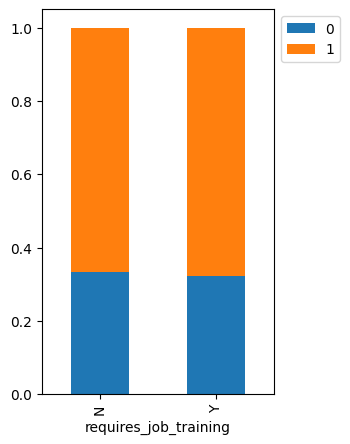

In [ ]:
stacked_barplot(visa,"requires_job_training","case_status")

This shows that people who require and don't require any job training have equal chances of visa approval and visa denial.This column doesn't significantly impact the visa approval rate.

#### Region of Employment Vs Case Status

Do certain regions in the US have higher visa approval rates compared to others?

case_status              0      1    All
region_of_employment                    
All                   8462  17018  25480
Northeast             2669   4526   7195
West                  2486   4100   6586
South                 2104   4913   7017
Midwest               1054   3253   4307
Island                 149    226    375
------------------------------------------------------------------------------------------------------------------------


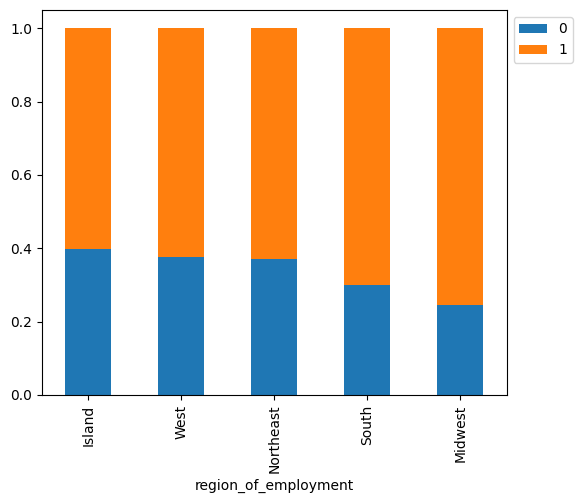

In [ ]:
stacked_barplot(visa,"region_of_employment","case_status")

 The Midwest and South show higher visa approval rates with a smaller proportion of denials.Island, West, and Northeast regions have moderate approval rates, but relatively more balanced with denials.

#### Unit of Wage Vs Case Status

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


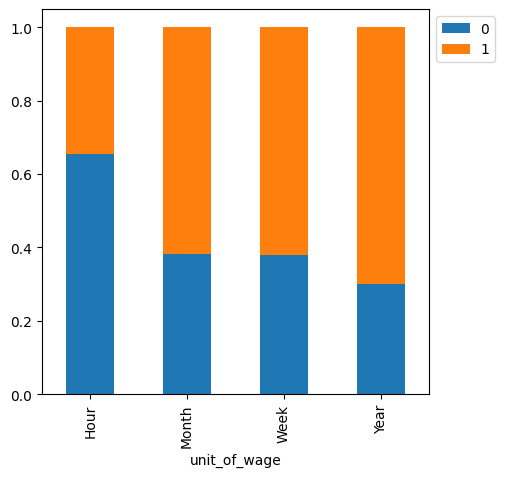

In [ ]:
stacked_barplot(visa,"unit_of_wage","case_status")

Job offerings with yearly wages have a high chance of visa approval, while monthly and weekly wage jobs show moderate but decent approval rates. However, jobs with hourly wages tend to have lower chances of visa approval and higher rates of denial.


#### Full time Vs Case Status

case_status            0      1    All
full_time_position                    
All                 8462  17018  25480
Y                   7610  15163  22773
N                    852   1855   2707
------------------------------------------------------------------------------------------------------------------------


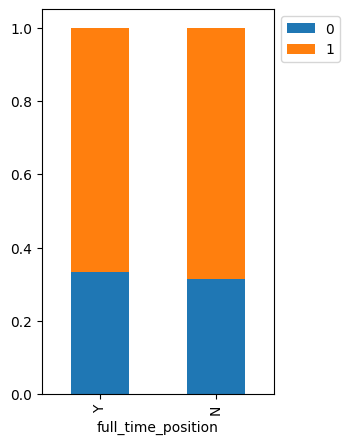

In [ ]:
stacked_barplot(visa,"full_time_position","case_status")

Jobs with and without full-time positions show similar visa approval and denial rates. This suggests that the full-time status of a job may not have a significant impact on visa outcomes.

**What is the distribution of visa case statuses (certified vs. denied)?**


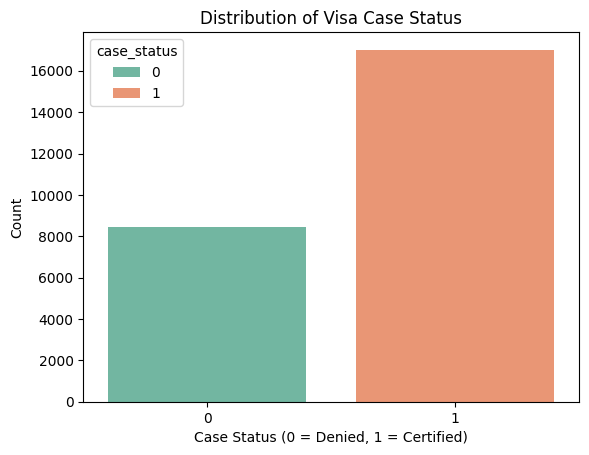

In [ ]:
sns.countplot(data=visa, x='case_status', palette='Set2',hue='case_status')
plt.title('Distribution of Visa Case Status')
plt.xlabel('Case Status (0 = Denied, 1 = Certified)')
plt.ylabel('Count')
plt.show()

There is a class imbalance problem.The plot shows most of the Visa's were approved.

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow",)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",

    )

    plt.tight_layout()
    plt.show()

**How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?**

/tmp/ipython-input-39-2515351124.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow",)
/tmp/ipython-input-39-2515351124.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


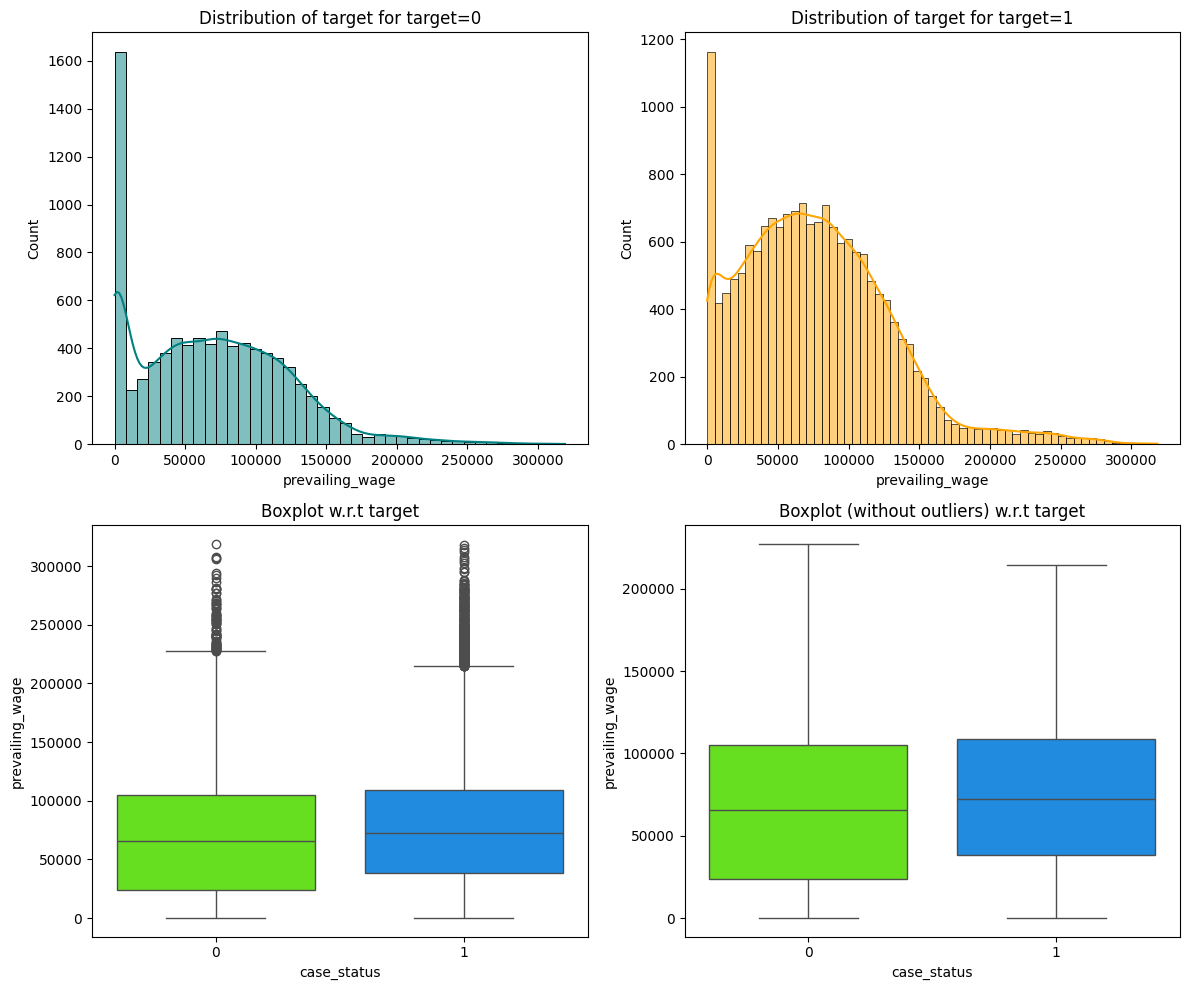

In [ ]:
distribution_plot_wrt_target(visa,"prevailing_wage","case_status")

Applicants with higher prevailing wages tend to have a greater chance of visa approval. The boxplot shows that the median wage for approved cases is higher than for denied ones, indicating a positive correlation between wage level and approval likelihood. However, since there's overlap, wage is an influencing factor but not the sole determinant.


**How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?**


/tmp/ipython-input-39-2515351124.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow",)
/tmp/ipython-input-39-2515351124.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


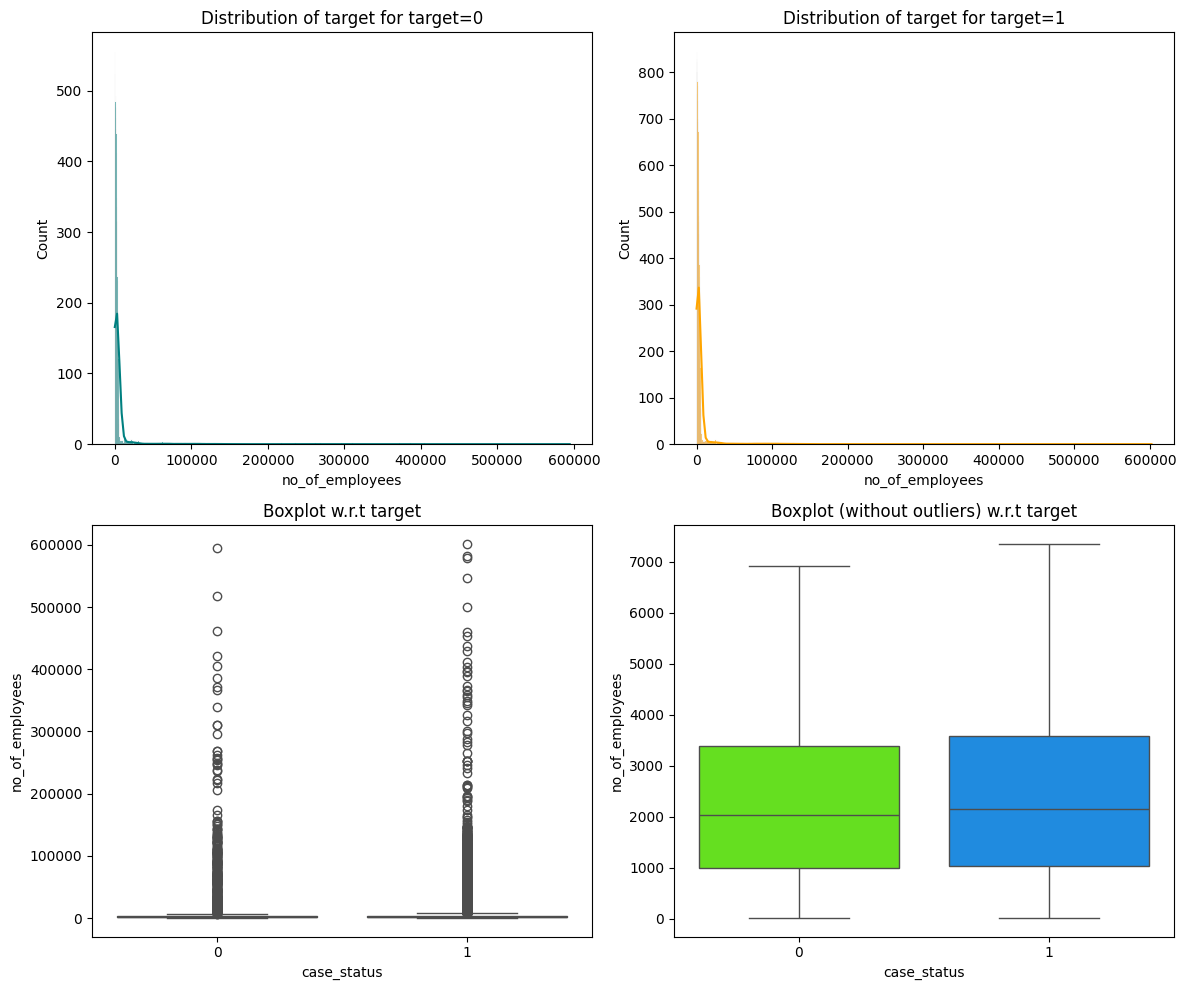

In [ ]:
distribution_plot_wrt_target(visa,"no_of_employees","case_status")

The number of employees in a company does not show a significant effect on visa approval rates. Both small and large companies have similar approval and denial patterns.

#### Year of establishment Vs Case status

/tmp/ipython-input-39-2515351124.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow",)
/tmp/ipython-input-39-2515351124.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


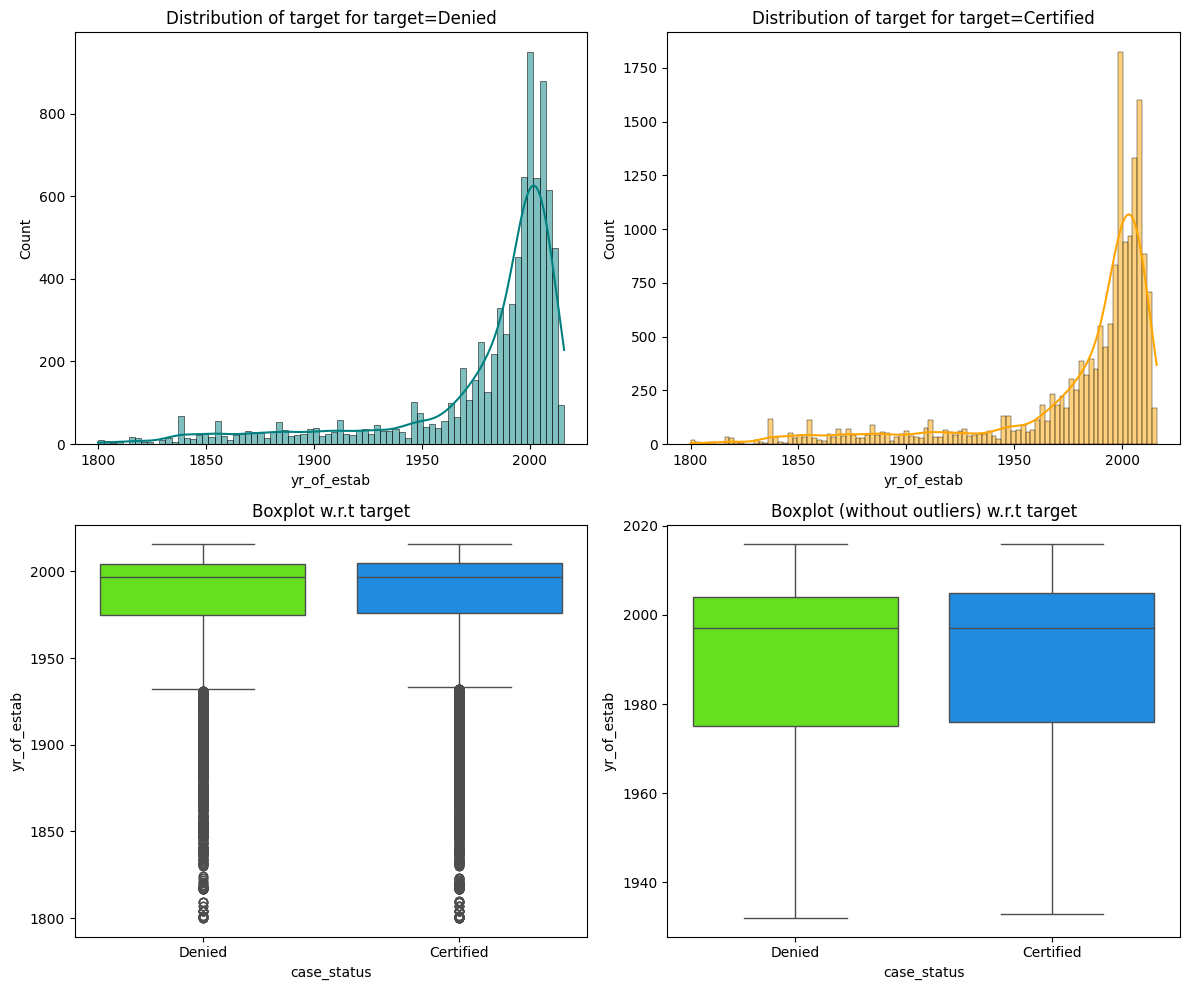

In [ ]:
distribution_plot_wrt_target(data,"yr_of_estab","case_status")

The year of establishment of a company does not significantly affect visa approval outcomes. Most applications—whether approved or denied—come from companies founded between 1980 and 2000, showing no strong influence of company age on visa decisions.

# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Columns like requires_job_training, full_time_position doesn't significantly impact the visa outcomes. We can remove those columns

In [ ]:
visa.drop(["requires_job_training","full_time_position"],axis = 1,inplace = True)

#### Missing value treatment

In [ ]:
visa.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
case_status,0


There are no null values.

####Outlier Detection

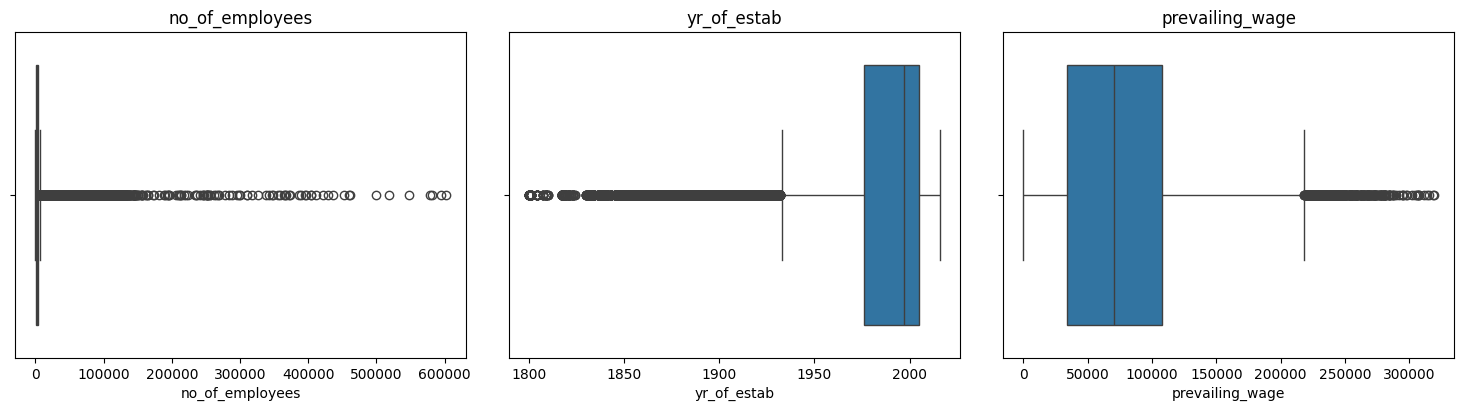

In [ ]:
import math
numeric_columns = visa.select_dtypes(include=["int","float"]).columns.tolist()
n_cols = 3
n_rows = math.ceil(len(numeric_columns)/n_cols)
numeric_columns.remove("case_status")

plt.figure(figsize=(5*n_cols,4*n_rows))

for i,variable in enumerate(numeric_columns):
  plt.subplot(n_rows,n_cols,i+1)
  sns.boxplot(data = visa,x=variable)
  plt.title(variable)

plt.tight_layout(pad=2)
plt.show()


There are outliers in the above columns; however, we are not treating them.

#### Feature Engineering

In [ ]:
category_columns = visa.select_dtypes(include=["category","object"]).columns.tolist()

for col in category_columns:
  print(visa[col].value_counts())
  print("-"*50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------


There are a few categorical columns, we need encode those columns

Before encoding we need to get the Dependent and Independent features.

In [ ]:
X = visa.drop(["case_status"],axis = 1)
Y = visa["case_status"]

In [ ]:
X = pd.get_dummies(X,drop_first=True)
X

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,14513,2007,592.203,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2412,2002,83425.650,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1
2,44444,2008,122996.860,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,98,1897,83434.030,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1082,2005,149907.390,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,2601,2008,77092.570,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
25476,3274,2006,279174.790,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
25477,1121,1910,146298.850,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
25478,1918,1887,86154.770,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1


Splitting the data into train,validation and test set

In [ ]:
x_temp,x_test,y_temp,y_test = train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)
x_train,x_valid,y_train,y_valid = train_test_split(x_temp,y_temp,test_size=0.3,random_state=1,stratify=y_temp)


In [ ]:
print("The shape of x_train :",x_train.shape)
print("The shape of x_valid :",x_valid.shape)
print("The shape of x_test :",x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_valid.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

The shape of x_train : (14268, 19)
The shape of x_valid : (6116, 19)
The shape of x_test : (5096, 19)
Percentage of classes in training set:
1   0.668
0   0.332
Name: case_status, dtype: float64
Percentage of classes in validation set:
1   0.668
0   0.332
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.668
0   0.332
Name: case_status, dtype: float64


# **Model Building**

**Model can make wrong predictions as**:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

**Which case is more important?**
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.


**How to reduce the losses?**

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
models = [] # creating a list of parameters

models.append(("Bagging",BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"),random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoosting",AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("xgboost",XGBClassifier(random_state = 1)))

print("Training Performance")
print()

for name,model in models:
  model.fit(x_train,y_train)
  score_train = f1_score(y_train,model.predict(x_train))
  print(f"The F1-score of {name} is : {score_train}")

print()

print("Validation Performance")
print()

for name,model in models:
  model.fit(x_train,y_train)
  score_val = f1_score(y_valid,model.predict(x_valid))
  print(f"The F1-Score of {name} is : {score_val}")

Training Performance

The F1-score of Bagging is : 0.9879429263412837
The F1-score of Random forest is : 1.0
The F1-score of GBM is : 0.8301401059458389
The F1-score of AdaBoosting is : 0.8221520524653875
The F1-score of dtree is : 1.0
The F1-score of xgboost is : 0.8943683104931479

Validation Performance

The F1-Score of Bagging is : 0.7769399172950621
The F1-Score of Random forest is : 0.7998598785614199
The F1-Score of GBM is : 0.8217341040462428
The F1-Score of AdaBoosting is : 0.8148653256051824
The F1-Score of dtree is : 0.7346186909001596
The F1-Score of xgboost is : 0.8069524913093858


The training and validation F1-scores indicate that most models, especially Random Forest and Decision Tree, have **overfit the data**. The perfect F1-scores on validation across all models are highly suspicious and likely point to issues such as **data leakage**.


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(x_train, y_train)
    scores_train = f1_score(y_train, model.predict(x_train))
    scores_val = f1_score(y_valid, model.predict(x_valid))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9879, Validation Score: 0.7769, Difference: 0.2110
Random forest: Training Score: 1.0000, Validation Score: 0.7999, Difference: 0.2001
GBM: Training Score: 0.8301, Validation Score: 0.8217, Difference: 0.0084
AdaBoosting: Training Score: 0.8222, Validation Score: 0.8149, Difference: 0.0073
dtree: Training Score: 1.0000, Validation Score: 0.7346, Difference: 0.2654
xgboost: Training Score: 0.8944, Validation Score: 0.8070, Difference: 0.0874


# **Model Performance Improvement**

## **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


#### Oversampling the data using SMOTE (creating synthetic data)

In [ ]:
print("Before oversampling, count of label Yes : {}".format(sum(y_train == 1)))
print("Before oversampling, count of label NO : {}\n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy=1,random_state=1,k_neighbors=5)

x_train_over,y_train_over = sm.fit_resample(x_train,y_train)


print("After oversampling, count of label Yes : {}".format(sum(y_train_over == 1)))
print("After oversampling, count of label No : {}\n".format(sum(y_train_over == 0)))

print("The shape of data after over sampling :{}".format(x_train_over.shape))
print("The shape of target after oversampling :{}".format(y_train_over.shape))

Before oversampling, count of label Yes : 9529
Before oversampling, count of label NO : 4739

After oversampling, count of label Yes : 9529
After oversampling, count of label No : 9529

The shape of data after over sampling :(19058, 19)
The shape of target after oversampling :(19058,)


Building the models with oversampled data

In [ ]:
models_over = []

models_over.append(("Bagging",BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"),random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("AdaBoosting",AdaBoostClassifier(random_state=1)))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models_over.append(("xgboost",XGBClassifier(random_state = 1)))


print("Training performance\n")

for variable,model in models_over:
  model.fit(x_train_over,y_train_over)
  score_train = f1_score(y_train_over,model.predict(x_train_over))
  print(f" The F1 score of {variable} is : {score_train}")

print()
print("Validation set Performance\n")

for variable,model in models_over:
  model.fit(x_train_over,y_train_over)
  score_valid = f1_score(y_valid,model.predict(x_valid))
  print(f" The F1 score of {variable} is : {score_valid}")


Training performance

 The F1 score of Bagging is : 0.9849973586899102
 The F1 score of Random forest is : 1.0
 The F1 score of GBM is : 0.8026518655565834
 The F1 score of AdaBoosting is : 0.7727225833075415
 The F1 score of dtree is : 1.0
 The F1 score of xgboost is : 0.8803340462368877

Validation set Performance

 The F1 score of Bagging is : 0.758137205808713
 The F1 score of Random forest is : 0.7848837209302325
 The F1 score of GBM is : 0.80306905370844
 The F1 score of AdaBoosting is : 0.7761922185632394
 The F1 score of dtree is : 0.7356955051959434
 The F1 score of xgboost is : 0.7976190476190477


After applying oversampling (SMOTE), the training scores remained high, but validation scores became more stable and comparable across models.
This indicates that oversampling improved the models' ability to generalize by handling class imbalance more effectively.

#### Undersampling the data

In [ ]:


print("Before undersampling, count of label Yes : {}".format(sum(y_train == 1)))
print("Before undersampling, count of label NO : {}\n".format(sum(y_train==0)))

rus = RandomUnderSampler(random_state=1)
x_train_under, y_train_under = rus.fit_resample(x_train,y_train)

print("After undersampling, count of label Yes : {}".format(sum(y_train_under == 1)))
print("After undersampling, count of label No : {}\n".format(sum(y_train_under == 0)))

print("The shape of data after undersampling :{}".format(x_train_under.shape))
print("The shape of target after undersampling :{}".format(y_train_under.shape))

Before undersampling, count of label Yes : 9529
Before undersampling, count of label NO : 4739

After undersampling, count of label Yes : 4739
After undersampling, count of label No : 4739

The shape of data after undersampling :(9478, 19)
The shape of target after undersampling :(9478,)


Building the models with under sampled data

In [ ]:
models_under = []

models_under.append(("Bagging",BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"),random_state=1)))
models_under.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models_under.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_under.append(("AdaBoosting",AdaBoostClassifier(random_state=1)))
models_under.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models_under.append(("xgboost",XGBClassifier(random_state = 1)))


print("Training performance\n")

for variable,model in models_over:
  model.fit(x_train_under,y_train_under)
  score_train = f1_score(y_train_under,model.predict(x_train_under))
  print(f" The F1 score of {variable} is : {score_train}")

print()
print("Validation set Performance\n")

for variable,model in models_over:
  model.fit(x_train_under,y_train_under)
  score_valid = f1_score(y_valid,model.predict(x_valid))
  print(f" The F1 score of {variable} is : {score_valid}")



Training performance

 The F1 score of Bagging is : 0.9765900587920898
 The F1 score of Random forest is : 1.0
 The F1 score of GBM is : 0.7300144598223508
 The F1 score of AdaBoosting is : 0.6957349984125304
 The F1 score of dtree is : 1.0
 The F1 score of xgboost is : 0.8713246917483402

Validation set Performance

 The F1 score of Bagging is : 0.7029218509716203
 The F1 score of Random forest is : 0.7395749260156039
 The F1 score of GBM is : 0.7742522756827048
 The F1 score of AdaBoosting is : 0.7536193385575773
 The F1 score of dtree is : 0.6945572705117791
 The F1 score of xgboost is : 0.7385272145144077


After applying undersampling, validation F1-scores dropped across most models compared to the oversampled version, indicating reduced generalization.
Models like Decision Tree and Random Forest still overfit the training data with F1-scores of 1.0, but their validation scores declined.
Overall, undersampling led to performance degradation due to loss of data, making models less stable compared to the generalization achieved with oversampling.


### Hyperparameter Tuning

#### Tuning Bagging classifier using Randomizedcv

In [ ]:
from sklearn.metrics import make_scorer, f1_score

In [ ]:
%%time

# defining model
model =  BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"),random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
# Type of scoring used to compare parameter combinations
f1_scorer = make_scorer(f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = 1, n_iter=20, scoring=f1_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.7910376337894842:
CPU times: user 4min 5s, sys: 625 ms, total: 4min 6s
Wall time: 4min 14s


In [ ]:

tuned_random_Bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth = 10,random_state=1, class_weight="balanced"),
    n_estimators=60,
    max_samples=0.8,
    max_features=0.7,
    random_state=1
)
tuned_random_Bagging.fit(x_train_over,y_train_over)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=10,
                                                   random_state=1),
                  max_features=0.7, max_samples=0.8, n_estimators=60,
                  random_state=1)

Checking the model performance on tarining set (oversampled data)

In [ ]:
tuned_random_Bagging_train = model_performance_classification_sklearn(tuned_random_Bagging,x_train_over,y_train_over)
tuned_random_Bagging_train

,Accuracy,Recall,Precision,F1
0,0.837,0.859,0.823,0.841


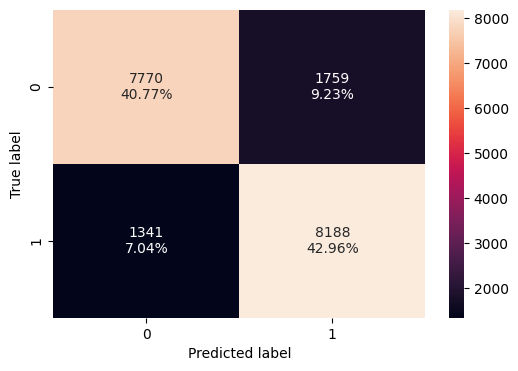

In [ ]:
confusion_matrix_sklearn(tuned_random_Bagging,x_train_over,y_train_over)

Checking the model performance on validation data


In [ ]:
tuned_random_Bagging_valid = model_performance_classification_sklearn(tuned_random_Bagging,x_valid,y_valid)
tuned_random_Bagging_valid

,Accuracy,Recall,Precision,F1
0,0.738,0.812,0.799,0.806


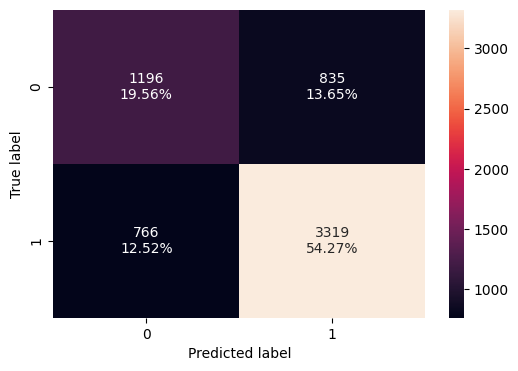

In [ ]:
confusion_matrix_sklearn(tuned_random_Bagging,x_valid,y_valid)

#### Tuning Bagging classifier using Gridcv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier.
model =  BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"),random_state=1)

# Grid of parameters to choose from
param_grid = param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
# Type of scoring used to compare parameter combinations
f1_scorer = make_scorer(f1_score)

# Run the grid search
grid_cv = GridSearchCV(model, param_grid, scoring=f1_scorer,cv=5)
grid_cv.fit(x_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'max_features': 0.8, 'max_samples': 0.9, 'n_estimators': 70} with CV score=0.7910376337894842:


In [ ]:
tuned_grid_bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth = 10,random_state=1, class_weight="balanced"),
    n_estimators=60,
    max_samples=0.8,
    max_features=0.7,
    random_state=1
)
tuned_grid_bagging.fit(x_train_over,y_train_over)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=10,
                                                   random_state=1),
                  max_features=0.7, max_samples=0.8, n_estimators=60,
                  random_state=1)

Checking model performance on training data(oversampled data)

In [ ]:
tuned_grid_Bagging_train = model_performance_classification_sklearn(tuned_grid_bagging,x_train_over,y_train_over)
tuned_grid_Bagging_train

,Accuracy,Recall,Precision,F1
0,0.837,0.859,0.823,0.841


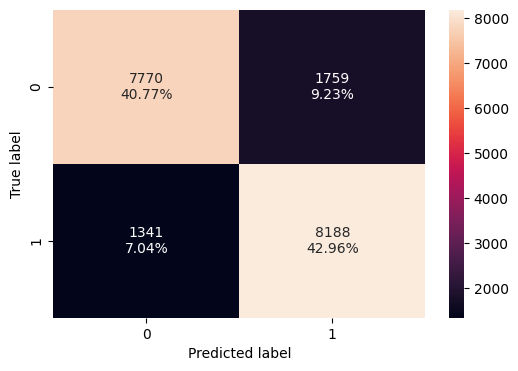

In [ ]:
confusion_matrix_sklearn(tuned_grid_bagging,x_train_over,y_train_over)

Checking the model performance on validation data

In [ ]:
tuned_grid_Bagging_valid = model_performance_classification_sklearn(tuned_grid_bagging,x_valid,y_valid)
tuned_grid_Bagging_valid

,Accuracy,Recall,Precision,F1
0,0.738,0.812,0.799,0.806


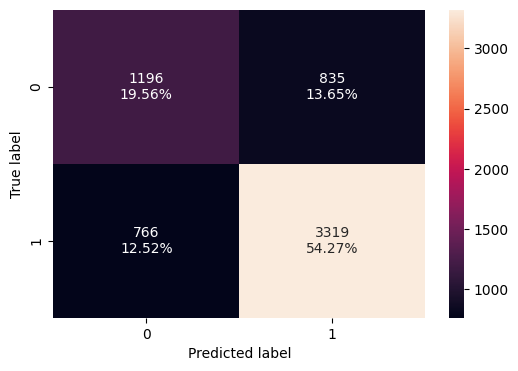

In [ ]:
confusion_matrix_sklearn(tuned_grid_bagging,x_valid,y_valid)

#### Tuning Random forest(Randomizedcv)

In [ ]:
%%time

# defining model
model =  RandomForestClassifier(random_state=1,class_weight="balanced")
# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": [1,2,3],
    "max_features": [0.3,0.4,0.5,'sqrt'],
    "max_samples": [0.4,0.7,0.1]
}
# Type of scoring used to compare parameter combinations
f1_scorer = make_scorer(f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = 1, n_iter=20, scoring=f1_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 3, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.7988272962055871:
CPU times: user 1min 23s, sys: 145 ms, total: 1min 24s
Wall time: 1min 24s


In [ ]:
tuned_randomforest = RandomForestClassifier(n_estimators=50,min_samples_leaf=3,max_samples=0.7,max_features=0.3,random_state=1,class_weight="balanced",max_depth=5)
tuned_randomforest.fit(x_train_over,y_train_over)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.3,
                       max_samples=0.7, min_samples_leaf=3, n_estimators=50,
                       random_state=1)

Checking model performance on train data(oversampled data)

In [ ]:
tuned_randomforest_train = model_performance_classification_sklearn(tuned_randomforest,x_train_over,y_train_over)
tuned_randomforest_train

,Accuracy,Recall,Precision,F1
0,0.777,0.803,0.763,0.783


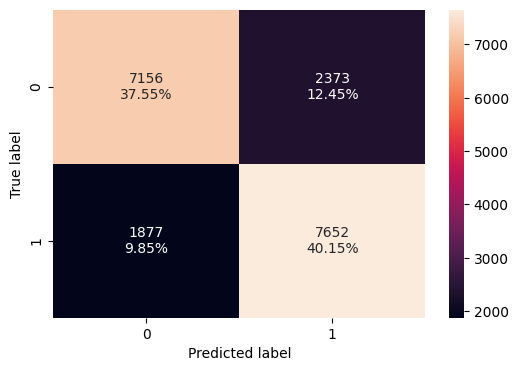

In [ ]:
confusion_matrix_sklearn(tuned_randomforest,x_train_over,y_train_over)

checking model performance on validation data

In [ ]:
tuned_randomforest_valid = model_performance_classification_sklearn(tuned_randomforest,x_valid,y_valid)
tuned_randomforest_valid

,Accuracy,Recall,Precision,F1
0,0.724,0.798,0.791,0.794


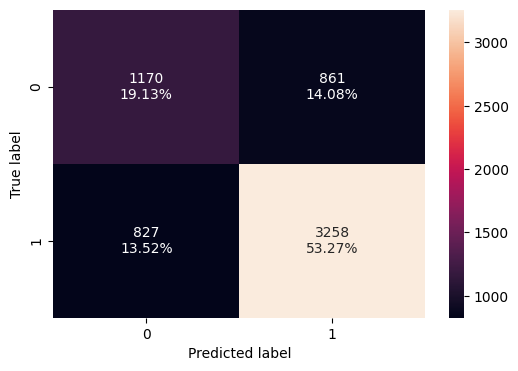

In [ ]:
confusion_matrix_sklearn(tuned_randomforest,x_valid,y_valid)

#### Tuning GradientBoost(GridCv)

In [ ]:
model =  GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
f1_scorer = make_scorer(f1_score)

# Run the grid search
grid_cv = GridSearchCV(model, param_grid, scoring=f1_scorer,cv=5)
grid_cv.fit(x_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'init': AdaBoostClassifier(random_state=1), 'learning_rate': 0.05, 'max_features': 0.5, 'n_estimators': 100, 'subsample': 0.9} with CV score=0.8253911213624878:


In [ ]:
tuned_gradient = GradientBoostingClassifier(init= AdaBoostClassifier(random_state=1), learning_rate= 0.05,max_features= 0.5, n_estimators= 100, subsample= 0.9,random_state=1)
tuned_gradient.fit(x_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5, random_state=1,
                           subsample=0.9)

checking the model performance on training data

In [ ]:
tuned_gradient_train = model_performance_classification_sklearn(tuned_gradient,x_train,y_train)
tuned_gradient_train

,Accuracy,Recall,Precision,F1
0,0.754,0.883,0.779,0.828


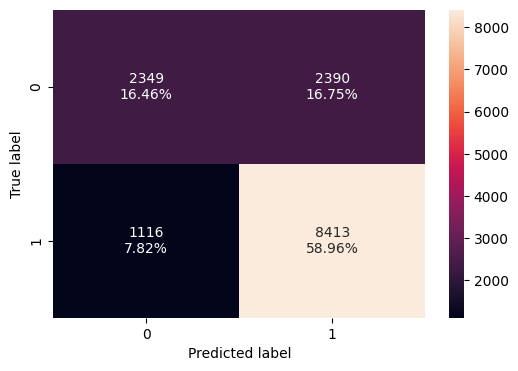

In [ ]:
confusion_matrix_sklearn(tuned_gradient,x_train,y_train)

Checking model performance on validation data

In [ ]:
tuned_gradient_valid = model_performance_classification_sklearn(tuned_gradient,x_valid,y_valid)
tuned_gradient_valid

,Accuracy,Recall,Precision,F1
0,0.746,0.876,0.774,0.822


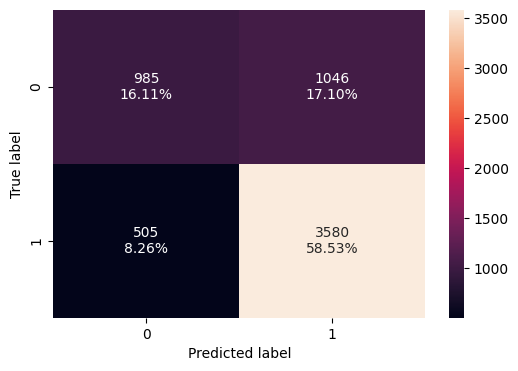

In [ ]:
confusion_matrix_sklearn(tuned_gradient,x_valid,y_valid)

#### Tuning AdaBoost(Gridcv)

In [ ]:
model =  AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
f1_scorer = make_scorer(f1_score)

# Run the grid search
grid_cv = GridSearchCV(model, param_grid, scoring=f1_scorer,cv=5)
grid_cv.fit(x_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.05, 'n_estimators': 100} with CV score=0.8251123491085417:


In [ ]:
tuned_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,random_state=1),learning_rate=0.05,n_estimators=100)
tuned_adaboost.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=100)

checking model performance on train set

In [ ]:
tuned_adaboost_train = model_performance_classification_sklearn(tuned_adaboost,x_train,y_train)
tuned_adaboost_train

,Accuracy,Recall,Precision,F1
0,0.752,0.882,0.776,0.826


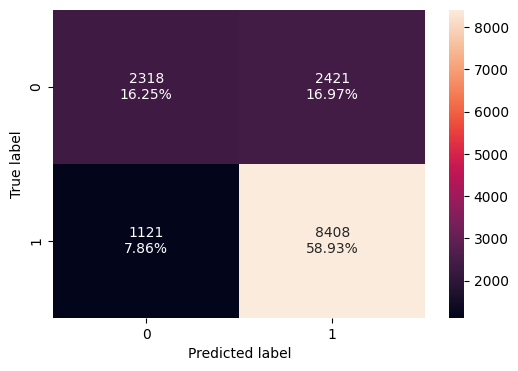

In [ ]:
confusion_matrix_sklearn(tuned_adaboost,x_train,y_train)

Checking the model performance on validation set

In [ ]:
tuned_adaboost_valid = model_performance_classification_sklearn(tuned_adaboost,x_valid,y_valid)
tuned_adaboost_valid

,Accuracy,Recall,Precision,F1
0,0.744,0.876,0.772,0.821


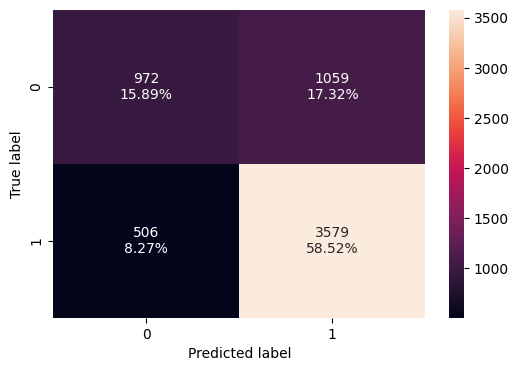

In [ ]:
confusion_matrix_sklearn(tuned_adaboost,x_valid,y_valid)

#### Tuned Decisiontree(Randomizedcv)


In [ ]:
# defining model
model =  DecisionTreeClassifier(random_state=1,class_weight="balanced")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
# Type of scoring used to compare parameter combinations
f1_scorer = make_scorer(f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = 1, n_iter=20, scoring=f1_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.7692829190595718:


In [ ]:
tuned_decisiontree = DecisionTreeClassifier(min_samples_leaf=7,min_impurity_decrease=0.0001,max_leaf_nodes=10,max_depth=5,random_state=1)
tuned_decisiontree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

Checking model performance on train set

In [ ]:
tuned_decisiontree_train = model_performance_classification_sklearn(tuned_decisiontree,x_train,y_train)
tuned_decisiontree_train

,Accuracy,Recall,Precision,F1
0,0.732,0.895,0.751,0.817


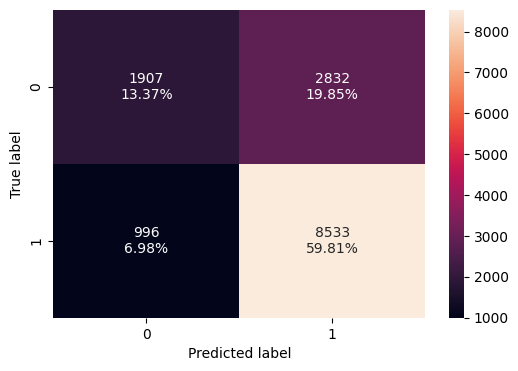

In [ ]:
confusion_matrix_sklearn(tuned_decisiontree,x_train,y_train)

checking model performance on validation set

In [ ]:
tuned_decisiontree_valid = model_performance_classification_sklearn(tuned_decisiontree,x_valid,y_valid)
tuned_decisiontree_valid

,Accuracy,Recall,Precision,F1
0,0.729,0.894,0.749,0.815


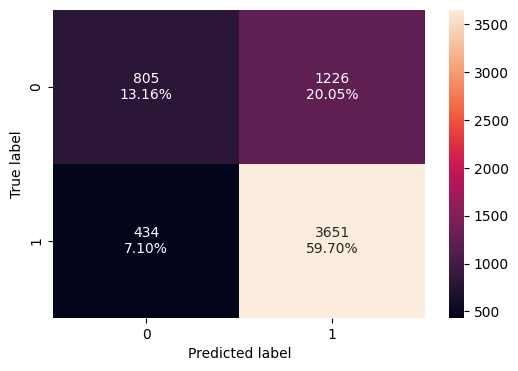

In [ ]:
confusion_matrix_sklearn(tuned_decisiontree,x_valid,y_valid)

#### Tuned XGboost(RandomizedCv)

In [ ]:
# defining model
model =  XGBClassifier(random_state = 1)

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
f1_scorer = make_scorer(f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = 1, n_iter=20, scoring=f1_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.8068441873918598:


In [ ]:
tuned_xgboost = XGBClassifier(subsample = 0.9,scale_pos_weight = 2,n_estimators = 100,learning_rate = 0.1,gamma=3)
tuned_xgboost.fit(x_train_over,y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

Checking the model performance on training set

In [ ]:
tuned_xgboost_train = model_performance_classification_sklearn(tuned_xgboost,x_train_over,y_train_over)
tuned_xgboost_train

,Accuracy,Recall,Precision,F1
0,0.808,0.936,0.745,0.830


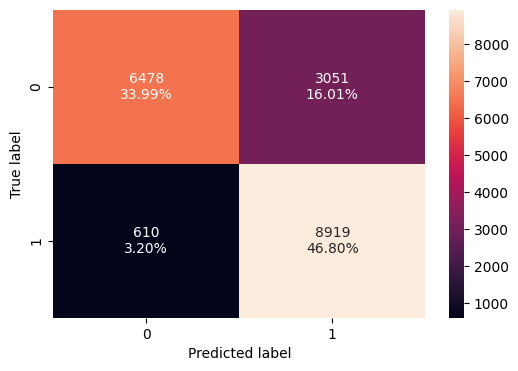

In [ ]:
confusion_matrix_sklearn(tuned_xgboost,x_train_over,y_train_over)


checking the performance on validation set

In [ ]:
tuned_xgboost_valid = model_performance_classification_sklearn(tuned_xgboost,x_valid,y_valid)
tuned_xgboost_valid

,Accuracy,Recall,Precision,F1
0,0.726,0.906,0.741,0.815


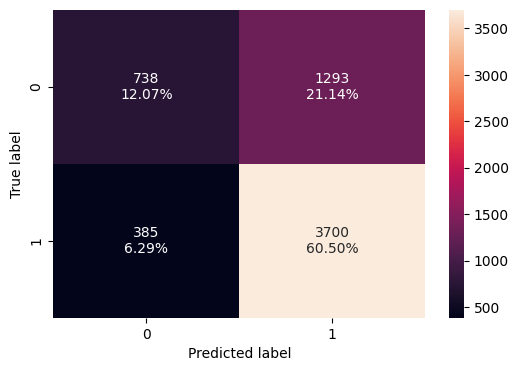

In [ ]:
confusion_matrix_sklearn(tuned_xgboost,x_valid,y_valid)

# **Model Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
      tuned_random_Bagging_train.T,
      tuned_randomforest_train.T,
      tuned_adaboost_train.T,
      tuned_gradient_train.T,
      tuned_decisiontree_train.T,
      tuned_xgboost_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "Tuned Decision Tree",
    "XGBoost Classifier Tuned",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned Bagging Classifier,Tuned Random Forest,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,Tuned Decision Tree,XGBoost Classifier Tuned
Accuracy,0.837,0.777,0.752,0.754,0.732,0.808
Recall,0.859,0.803,0.882,0.883,0.895,0.936
Precision,0.823,0.763,0.776,0.779,0.751,0.745
F1,0.841,0.783,0.826,0.828,0.817,0.830


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
      tuned_random_Bagging_valid.T,
      tuned_randomforest_valid.T,
      tuned_adaboost_valid.T,
      tuned_gradient_valid.T,
      tuned_decisiontree_valid.T,
      tuned_xgboost_valid.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "Tuned Decision Tree",
    "XGBoost Classifier Tuned",
]

print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Tuned Bagging Classifier,Tuned Random Forest,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,Tuned Decision Tree,XGBoost Classifier Tuned
Accuracy,0.738,0.724,0.744,0.746,0.729,0.726
Recall,0.812,0.798,0.876,0.876,0.894,0.906
Precision,0.799,0.791,0.772,0.774,0.749,0.741
F1,0.806,0.794,0.821,0.822,0.815,0.815


Tuned Gradient Boost algorithm worked well on the data, so we check its performance on the test data as well.

In [ ]:
# performance on test data
test_performance = model_performance_classification_sklearn(tuned_gradient,x_test,y_test)
test_performance

,Accuracy,Recall,Precision,F1
0,0.738,0.875,0.766,0.817


#### Feature importance

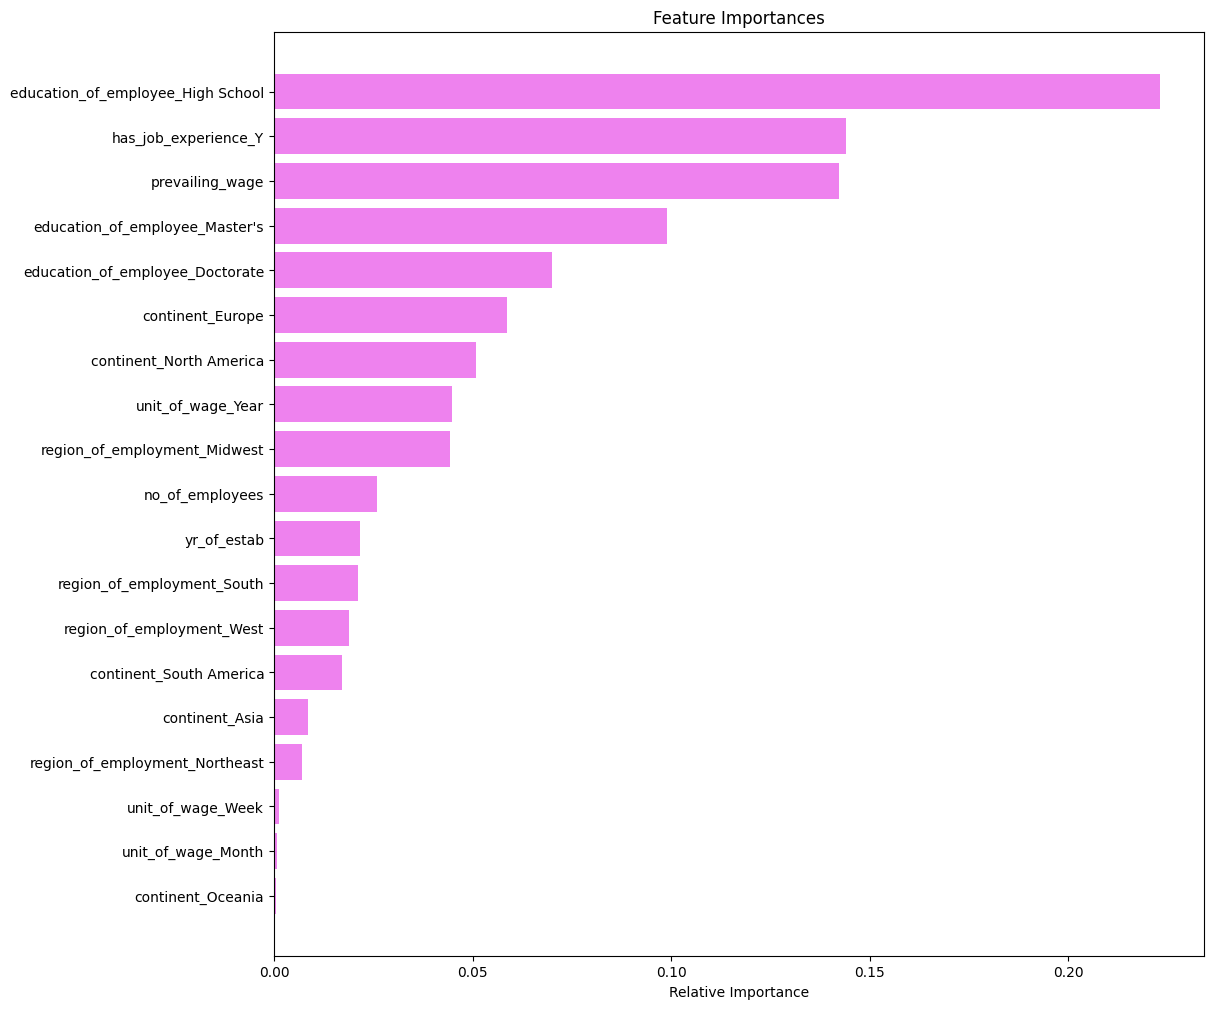

In [ ]:
feature_names = x_train.columns
importances = tuned_gradient.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Actionable Insights and Recommendations**


## **Actionable Insights**

* **Wage level plays a critical role** in visa approvals; cases with wages below the prevailing standard are more likely to be denied.
* **Employer history influences outcomes**, with certain employers associated with higher denial rates, signaling the need for employer credibility analysis.
* **Full-time positions and experience levels** are strong approval indicators; applicants lacking these tend to face higher rejection risks.
* **Visa types show different patterns** in approvals, suggesting that a one-size-fits-all model may underperform across categories.

## **Recommendations**

* **Build a user-facing screening tool** that provides real-time likelihood feedback based on the model’s predictions to help users pre-evaluate their chances.
* **Add wage compliance alerts** that notify users when offered salaries fall below prevailing wage benchmarks to reduce avoidable denials.
* **Develop visa-type-specific models** to enhance prediction accuracy and better reflect the nuances of different application criteria.
* **Introduce explainable AI outputs** such as SHAP-based insights, making the predictions understandable and actionable for legal professionals.
* **Create an employer risk score dashboard** for B2B clients to evaluate applicant batches and proactively mitigate high-risk cases.
* **Incorporate fairness audits** to ensure unbiased decision support across demographics and nationalities, promoting ethical AI use.



___